In [17]:
# Third party imports
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Reload library
from importlib import reload

# Local application imports
import smile.smile; reload(smile.smile)
from smile.smile import PopulationList, Methodology, RegressionResultList
import smile.example_populations; reload(smile.example_populations)
import smile.helper; reload(smile.helper);

In [19]:
# Settings
seed = 3 # chosen by fair dice roll. guaranteed to be random. https://xkcd.com/221/
np.random.seed(seed)
np.set_printoptions(edgeitems=30, linewidth=100000)

# Population generation

In [20]:
pops_noerror, pops_mulerror, pops_adderror = smile.example_populations.get_useful_poplists(100)
    
pops_noerror.generate()
pops_mulerror.generate()
pops_adderror.generate()

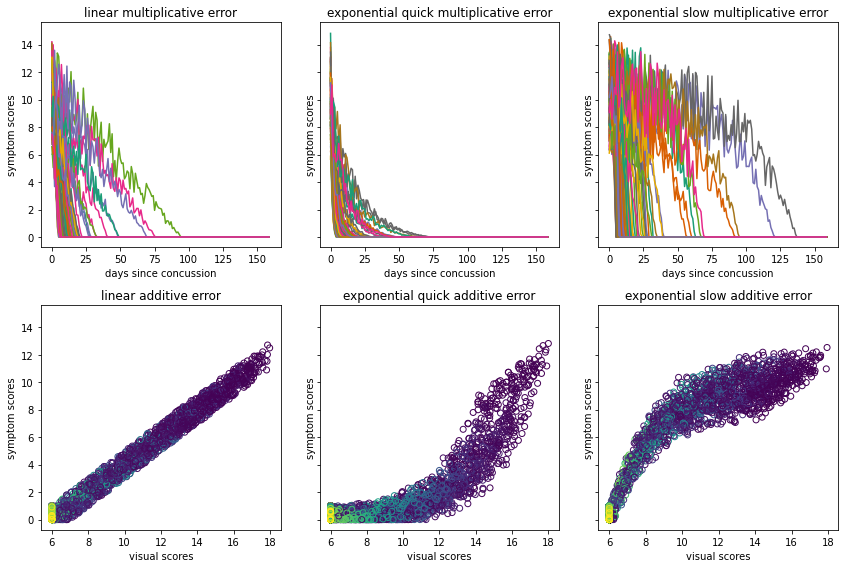

In [5]:
ncols = len(pops_noerror)
nrows = len([pops_mulerror, pops_adderror])

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharey=True)
npersons=None
ndays=None

pops_mulerror.plot(axes[0, :], x='day', y='symptom', viztype='lines', vizcolor='person', npersons=npersons, ndays=ndays)
pops_adderror.plot(axes[1, :], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()

# Study

## Comparing traditional studies

In [23]:
pops = pops_mulerror

In [25]:
methodologies = [Methodology('trad short', [8, 15, 29]), Methodology('trad long', [8, 29, 90])]

meth_pops = []
for methodology in methodologies:
    meth_pops.append(methodology.sample(pops))

8
(100, 160)
Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Type 'copyright', 'credits' or 'license' for more information
IPython 7.16.1 -- An enhanced Interactive Python. Type '?' for help.



In [1]:  np.take_along_axis(smilescores.view(np.ndarray), milestone_days.view(np.ndarray), axis=1)


Out[1]: array([], shape=(100, 0), dtype=float64)



In [2]:  quit


ValueError: Unknown subscript: (array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90],
       [91],
       [92],
       [93],
       [94],
       [95],
       [96],
       [97],
       [98],
       [99]]), array([], shape=(100, 0), dtype=int32)) with types [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>]

In [ ]:
ncols = len(meth_pops[0])
nrows = len(meth_pops)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharex=True, sharey=True)
npersons=None
ndays=None

for row in range(nrows):
    meth_pops[row].plot(axes[row, :], x='visual', y='symptom', viztype='lines', vizcolor='person', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()

## Comparing traditional to smile studies

In [ ]:
pops = pops_adderror

In [ ]:
methodologies2 = [Methodology('trad short', [8, 15, 29, 90]), Methodology('smile', [8, 0.7, 0.4, 0.1])]

meth_pops2 = []
for methodology in methodologies2:
    meth_pops2.append(methodology.sample(pops))

In [ ]:
ncols = len(meth_pops2[0])
nrows = len(meth_pops2)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharex=True, sharey=True)
npersons=None
ndays=None

for row in range(nrows):
    meth_pops2[row].plot(axes[row, :], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()

## Regression test

In [ ]:
print("Stastmodels.regression.linear_model may give a RuntimeWarning: invalid value encountered in double_scalars."
      +"This happens due to a np.NaN when calculating the rsquared value")
poplist_reglists = []
for poplist in meth_pops2:
    reglists = poplist.regress_persons(x='visual', y='symptom')
    poplist_reglists.append(reglists)

In [ ]:
ncols = len(meth_pops2[0])
nrows = len(meth_pops2)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharey=True)

for row in range(nrows):
    for col in range(ncols):
        poplist_reglists[row][col].plot_box(axes[row, col])
        
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
with pd.option_context('display.float_format', lambda s: '{:8.2f}'.format(s)):
    for row in range(nrows):
        text_blocks = []
        for col in range(ncols):
            df = poplist_reglists[row][col].params_dataframe
            dfoutliers = pd.concat([df.min(), df.max()], axis=1)
            dfoutliers.columns = ["min", "max"]
            text_blocks.append(str(dfoutliers))
        print(smile.helper.collocate_text(text_blocks))
        print()

In [ ]:
import pandas as pd
with pd.option_context('display.float_format', lambda s: '{:8.2f}'.format(s)):
    for row in range(nrows):
        text_blocks = []
        for col in range(ncols):
            df = poplist_reglists[row][col].params_dataframe
            dfoutliers = pd.concat([df.idxmin(), df.idxmax()], axis=1)
            dfoutliers.columns = ["idxmin", "idxmax"]
            text_blocks.append(str(dfoutliers))
        print(smile.helper.collocate_text(text_blocks))
        print()

In [ ]:
print("Summary of worst outlier population+methodology:")
print()

(worst_meth_idx, worst_pop_idx) = (1, 2) #set manually, looking at worse outlier from previous cells
pop_w_outliers = pops[worst_meth_idx]
pop_sampled_w_outliers = meth_pops2[worst_meth_idx][worst_pop_idx] 
regs_w_outliers = poplist_reglists[worst_meth_idx][worst_pop_idx]

fig, ax = plt.subplots(figsize=plt.figaspect(1/1)*1, sharey=True)
regs_w_outliers.plot_box(ax)
plt.tight_layout()
plt.show()

print()

df = regs_w_outliers.params_dataframe
dfoutliers = pd.concat([df.min(), df.max()], axis=1)
dfoutliersidx = pd.concat([df.idxmin(), df.idxmax()], axis=1)
dfoutliers.columns = ["min", "max"]
dfoutliersidx.columns = ["idxmin", "idxmax"]

smile.helper.print_collocated([dfoutliers, dfoutliersidx], separatorlen=3)

In [ ]:
print("In-depth summary of worst outlier population+methodology:")
print()

indices = list(df.idxmin()) #could also use df.idxmax: both seem to give the same indices, but reversed

outliers = PopulationList([pop_w_outliers.get_person_as_population(idx) for idx in indices])
outliers_sampled = PopulationList([pop_sampled_w_outliers.get_person_as_population(idx) for idx in indices])
outliers_regressed = RegressionResultList([regs_w_outliers[idx] for idx in indices])

ncols=len(outliers)
nrows=3 # also equal to len([outliers, outliers_sampled, outliers_regressed])
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, squeeze=False, sharex='row')

outliers.plot(axes[0, :], x='day', y='symptom', viztype='lines', vizcolor='person', ndays=91)
outliers_sampled.plot(axes[1, :], x='visual', y='symptom', viztype='points', vizcolor='day')
smile.helper.print_collocated([str(outlier_sampled.to_dataframe()) for outlier_sampled in outliers_sampled], separatorlen=4)
#TODO add to smile.smile.RegressionResultList
for col in range(ncols):
    outliers_regressed[col].plot_line(axes[2, col], alpha=0.05)
plt.tight_layout()
plt.show()

Problem: regression fails spectacularly when multiple visual scores get the same symptom score
Solution: filter better